<a href="https://colab.research.google.com/github/diegosfc91/EJERCICIOS-DE-CORE-Machine-Learning/blob/main/Challenge_T%C3%A9cnico_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga y Exploración Inicial de Datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

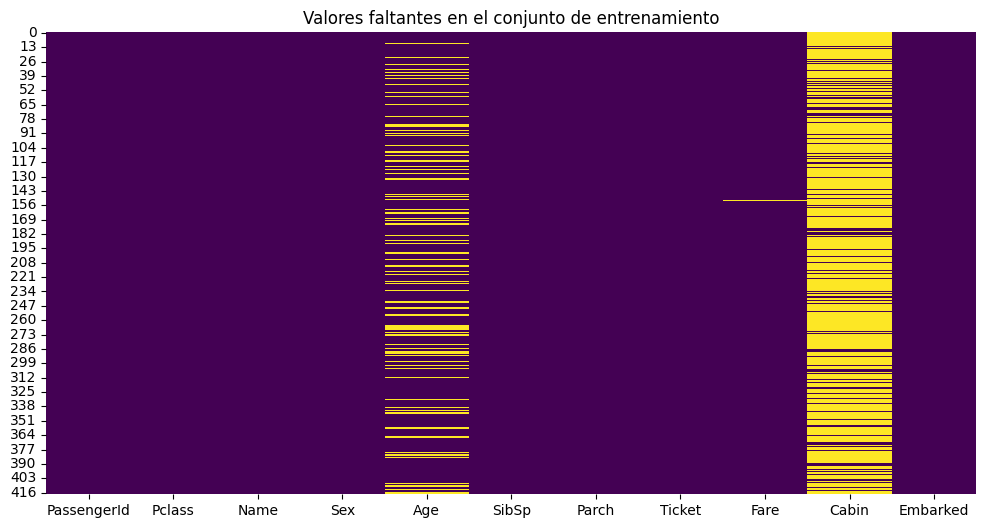

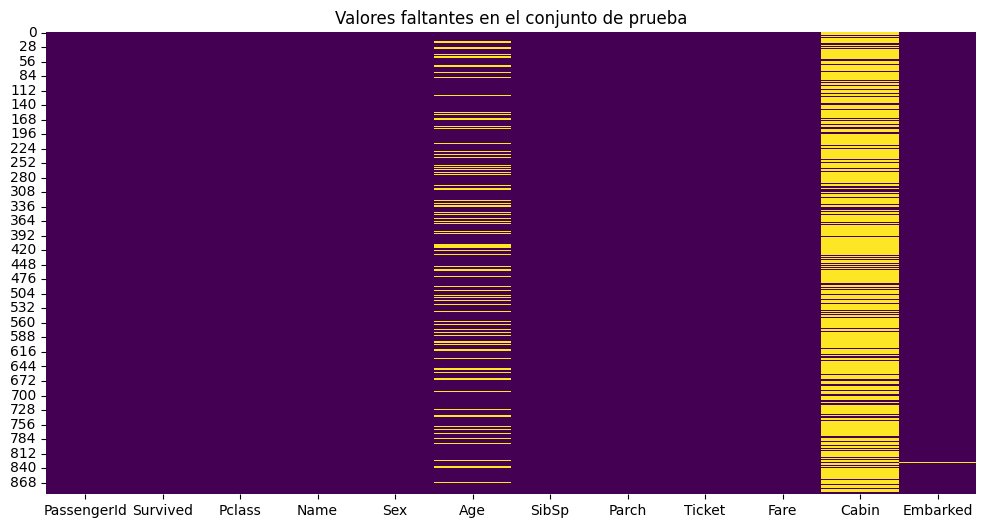

(None,
 None,
    PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datasets
train_path = '/content/test.csv'
test_path = '/content/train.csv'

# Leer los datos
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Exploración inicial de los datos
train_info = train.info()
test_info = test.info()

train_head = train.head()
test_head = test.head()

# Identificar valores faltantes
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Valores faltantes en el conjunto de entrenamiento")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title("Valores faltantes en el conjunto de prueba")
plt.show()

# Identificar outliers para variables numéricas
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
outliers_summary = {}
for column in numeric_columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
    outliers_summary[column] = len(outliers)

# Resumen de la exploración
(train_info, test_info, train_head, test_head, train_missing, test_missing, outliers_summary)


# Análisis Exploratorio de Datos (EDA)

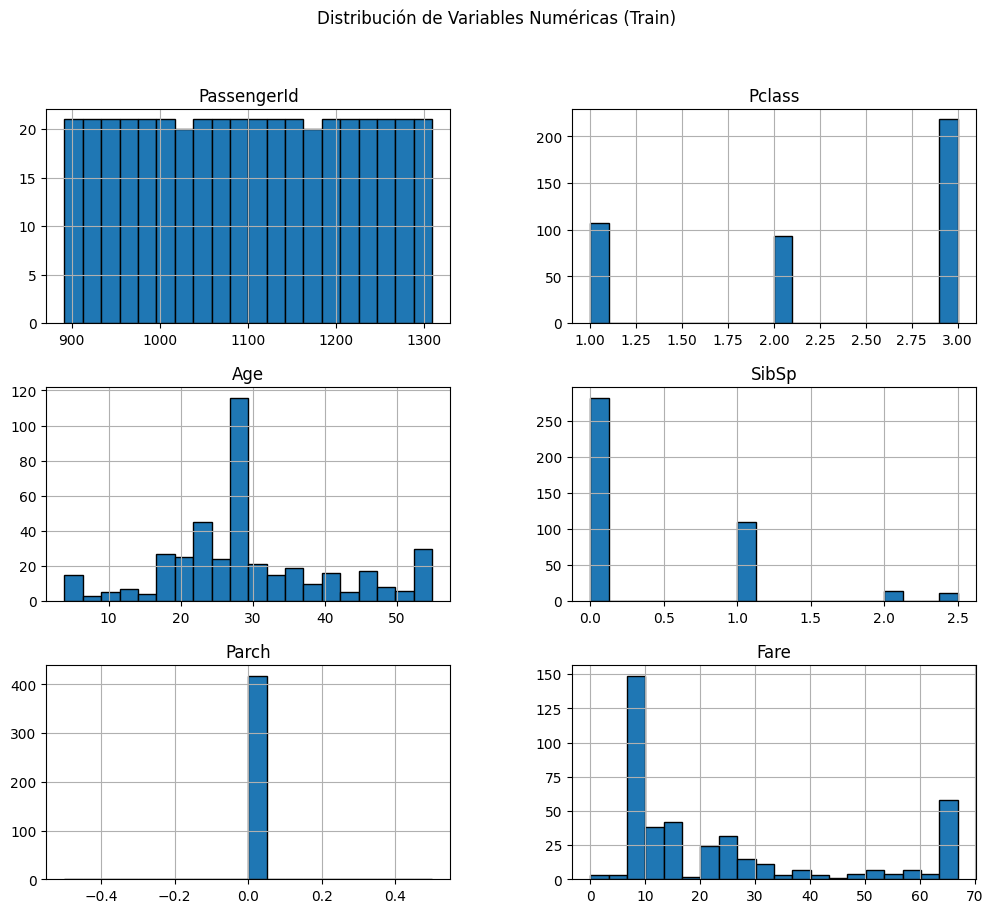

<ipython-input-4-f9102e72b619>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis", order=train[col].value_counts().index)


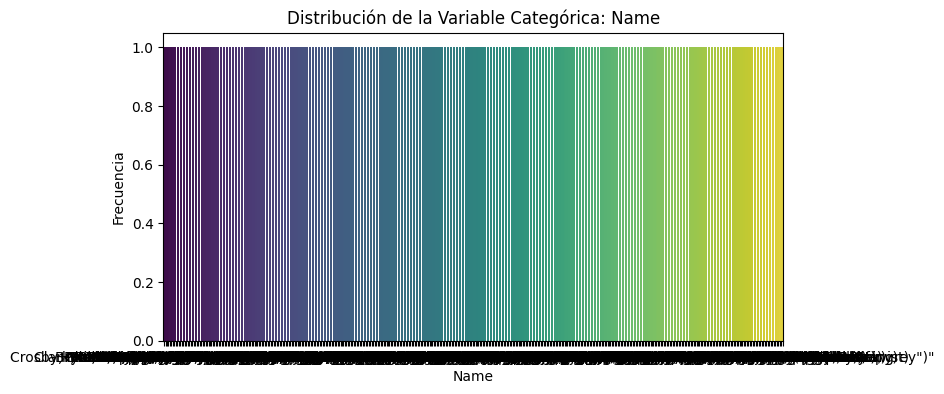

<ipython-input-4-f9102e72b619>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis", order=train[col].value_counts().index)


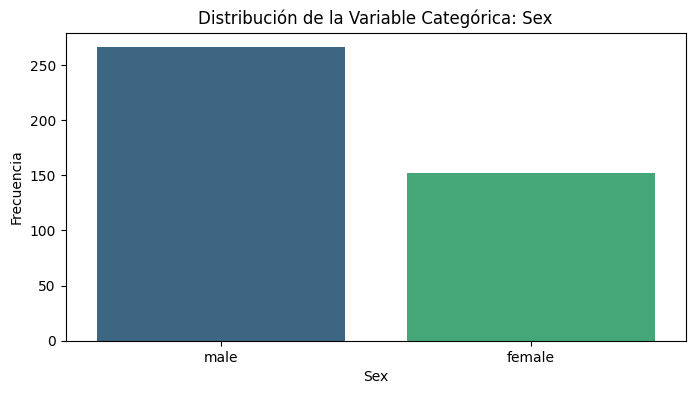

<ipython-input-4-f9102e72b619>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis", order=train[col].value_counts().index)


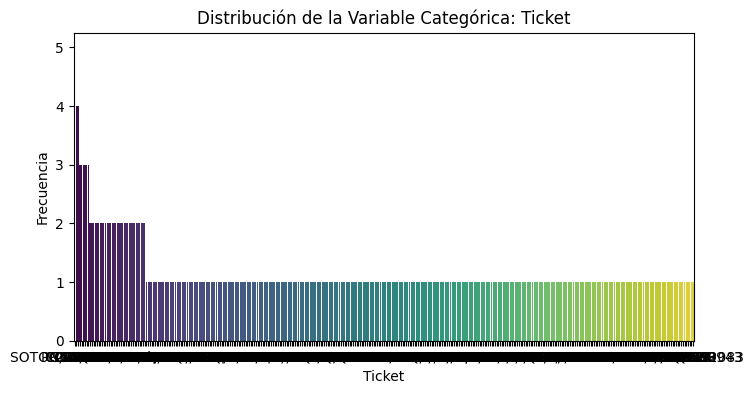

<ipython-input-4-f9102e72b619>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis", order=train[col].value_counts().index)


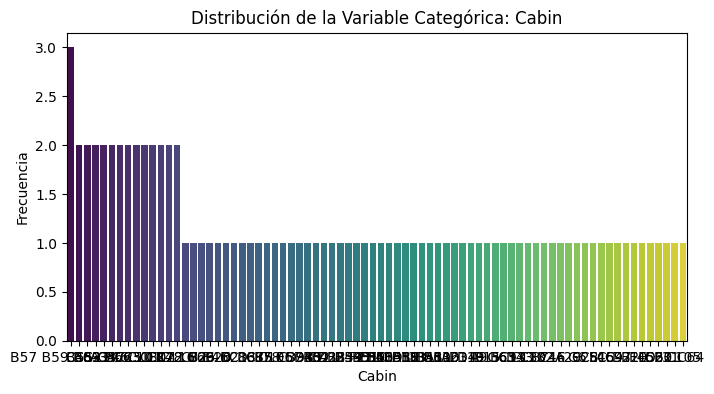

<ipython-input-4-f9102e72b619>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="viridis", order=train[col].value_counts().index)


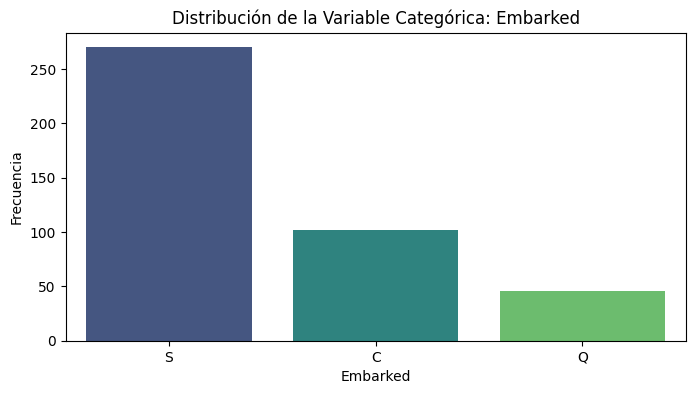

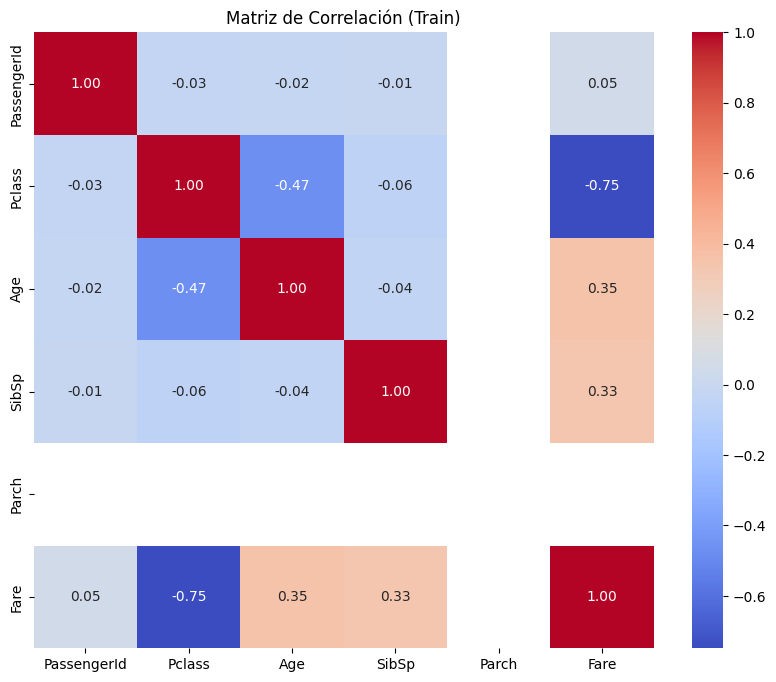

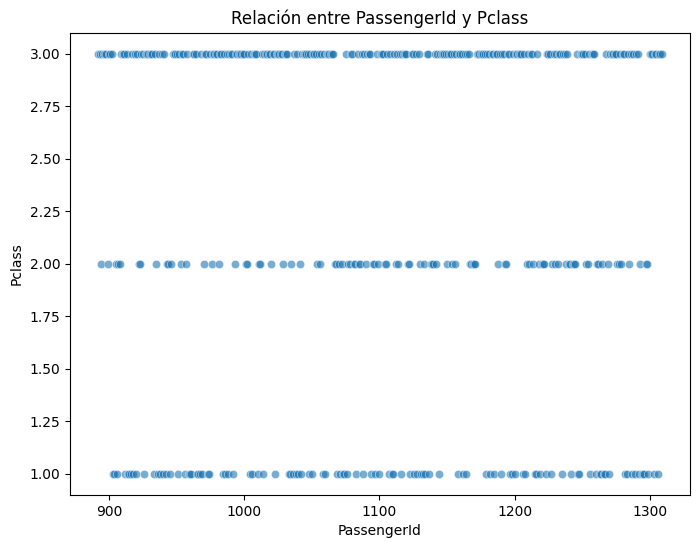

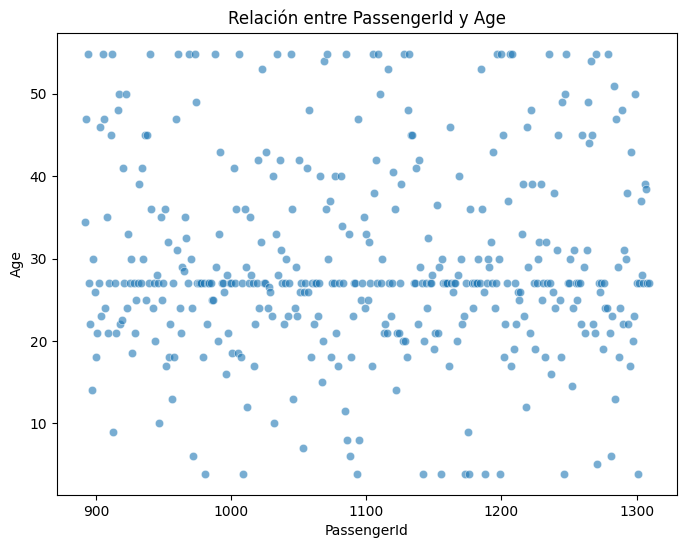

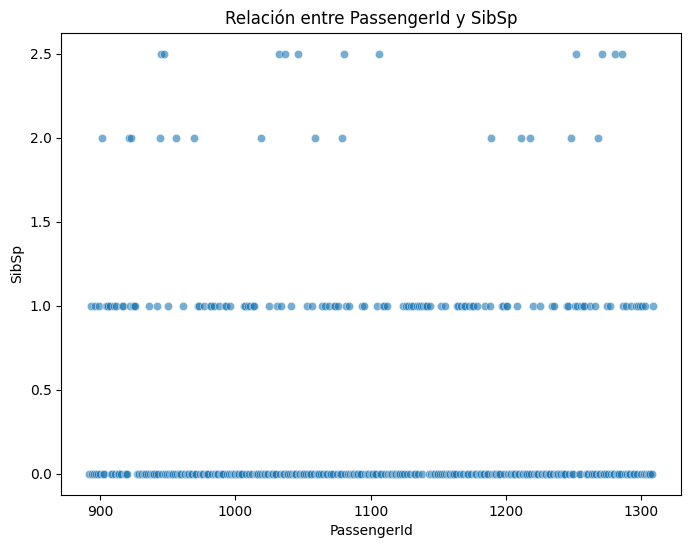

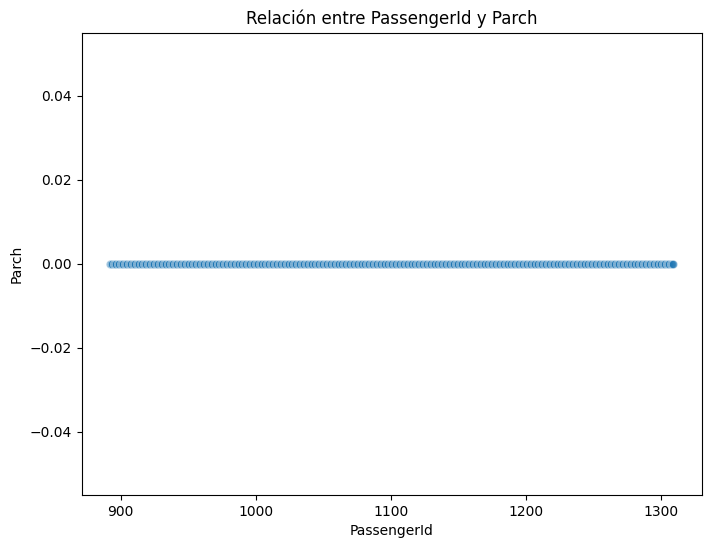

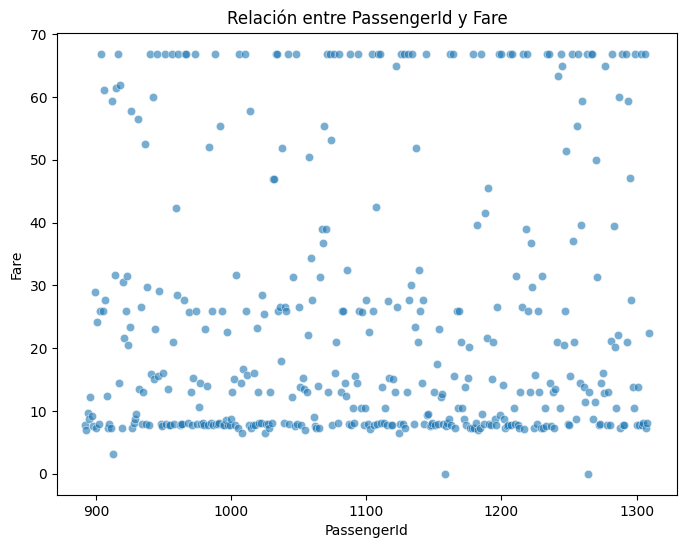

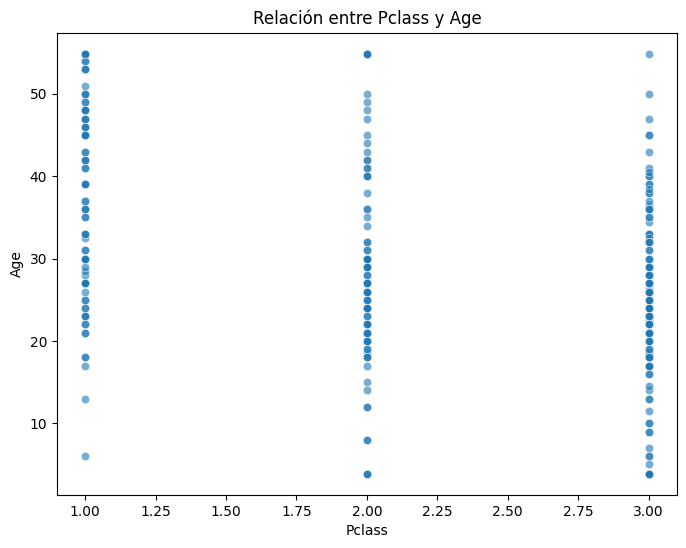

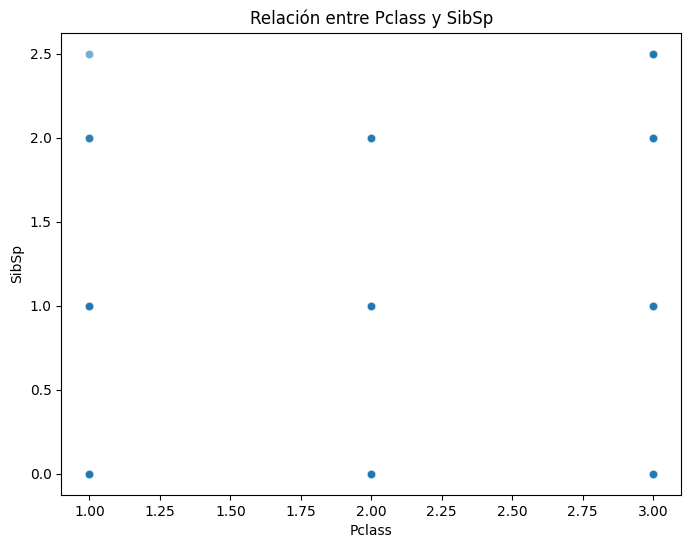

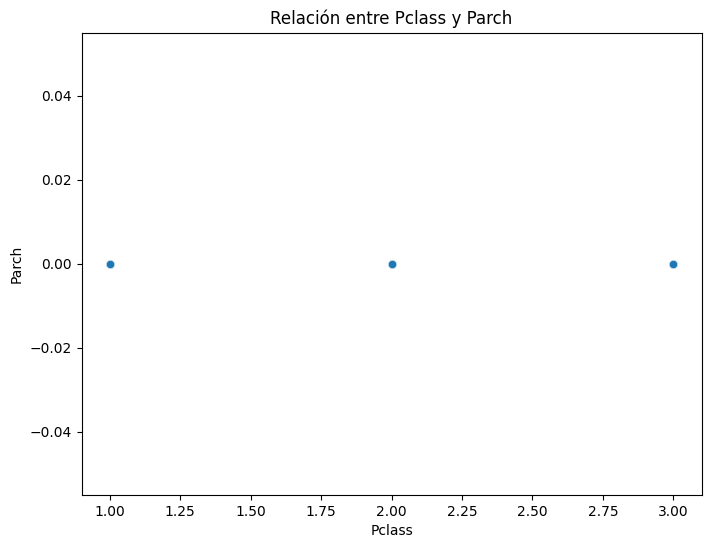

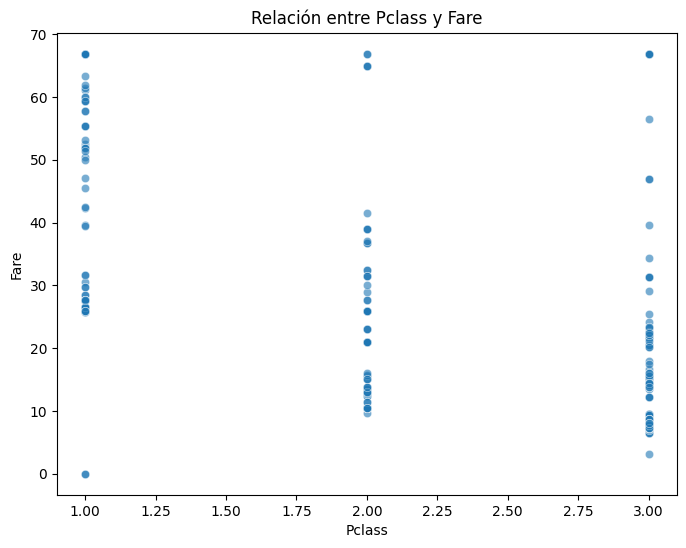

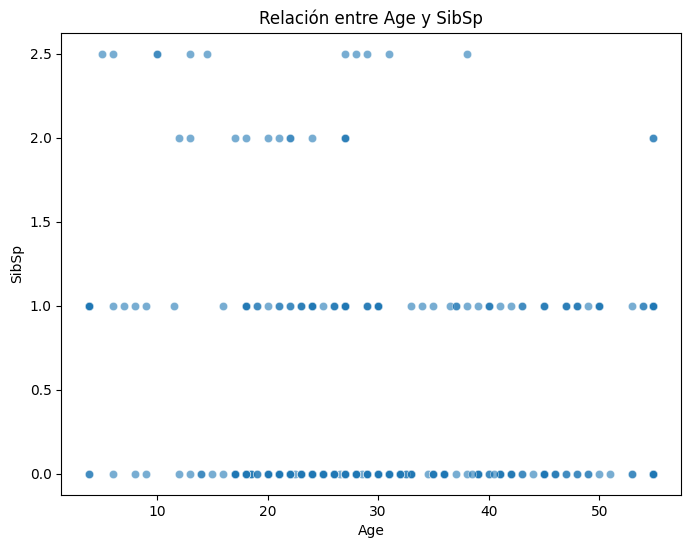

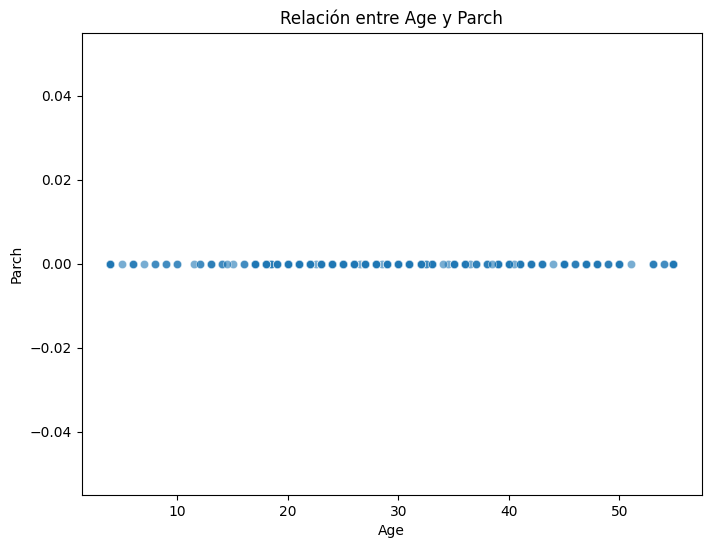

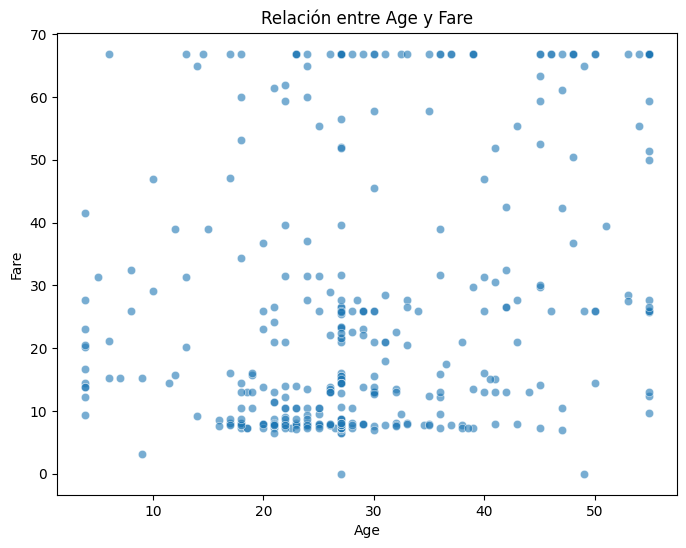

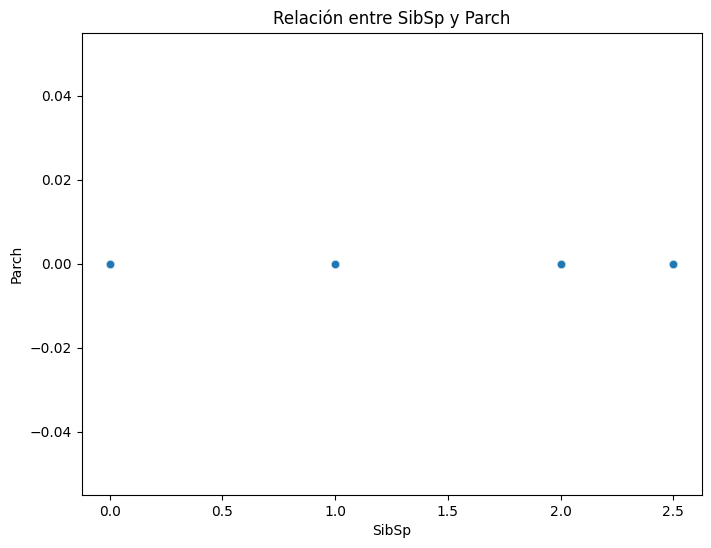

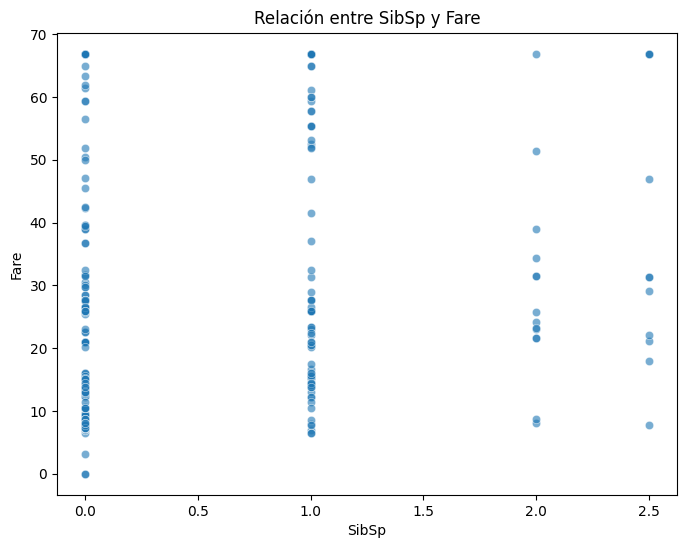

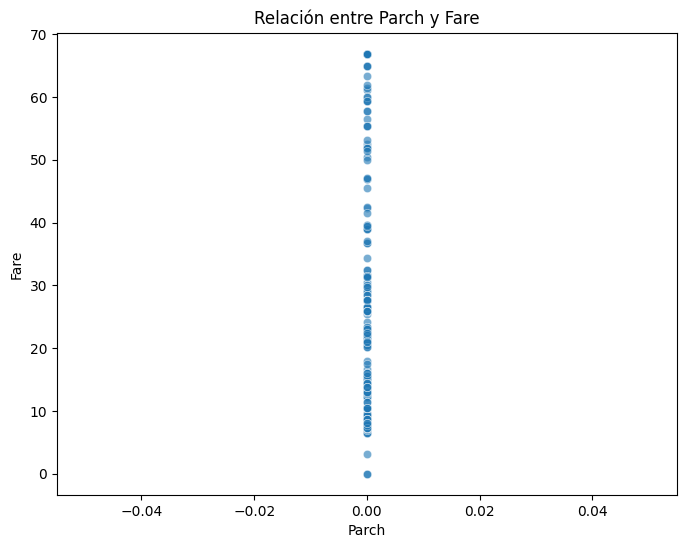

(       PassengerId      Pclass         Age       SibSp  Parch        Fare
 count   418.000000  418.000000  418.000000  418.000000  418.0  417.000000
 mean   1100.500000    2.265550   29.355263    0.395933    0.0   24.677709
 std     120.810458    0.841838   11.768812    0.637033    0.0   21.230978
 min     892.000000    1.000000    3.875000    0.000000    0.0    0.000000
 25%     996.250000    1.000000   23.000000    0.000000    0.0    7.895800
 50%    1100.500000    3.000000   27.000000    0.000000    0.0   14.454200
 75%    1204.750000    3.000000   35.750000    1.000000    0.0   31.500000
 max    1309.000000    3.000000   54.875000    2.500000    0.0   66.906300,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [4]:

# 1. Calcular estadísticas descriptivas básicas
train_stats = train.describe()

# 2. Crear visualizaciones para entender la distribución de las variables y sus relaciones

# Histograma de variables numéricas
train.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas (Train)")
plt.show()

# Gráfico de barras para variables categóricas
categorical_columns = train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, x=col, palette="viridis", order=train[col].value_counts().index)
    plt.title(f"Distribución de la Variable Categórica: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación (Train)")
plt.show()

# Relación entre variables numéricas (scatterplots)
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        if i < j:  # Evitar duplicados
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=train, x=col1, y=col2, alpha=0.6)
            plt.title(f"Relación entre {col1} y {col2}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

# 3. Detectar y tratar valores faltantes y outliers

# Valores faltantes
missing_values = train.isnull().sum()

# Tratar valores faltantes (Ejemplo: Imputación con la mediana o moda)
train['Age'].fillna(train['Age'].median())
train['Embarked'].fillna(train['Embarked'].mode()[0])
if 'Fare' in test.columns:
    test['Fare'].fillna(test['Fare'].median())

# Detectar y tratar outliers (Ejemplo: Winsorización para limitar outliers extremos)
for column in numeric_columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[column] = np.where(train[column] < lower_bound, lower_bound, train[column])
    train[column] = np.where(train[column] > upper_bound, upper_bound, train[column])

# Resumen final
(train_stats, missing_values)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separar características y objetivo
X = train.drop('Survived', axis=1)
y = train['Survived']

# Identificar columnas categóricas y numéricas
categorical_columns = ['Sex', 'Embarked']
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

# Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_valid, y_train, y_valid = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Mostrar formas de los conjuntos resultantes
print("Formas de los conjuntos resultantes:")
print(f"X_train: {X_train.shape}, X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}, y_valid: {y_valid.shape}")





KeyError: "['Survived'] not found in axis"

In [10]:
print(train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone'],
      dtype='object')
